In [1]:
import torch
import clip
from PIL import Image
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import numpy as np

/home/kush/anaconda3/envs/kush/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

In [5]:
crested_auklet_loc = f'/home/kush/Desktop/Experiments/CUB/CUB_200_2011/images/006.Least_Auklet'
images_names = os.listdir(crested_auklet_loc)

# Without using any GPT

100%|██████████████████████████████████████████| 41/41 [00:00<00:00, 131.80it/s]


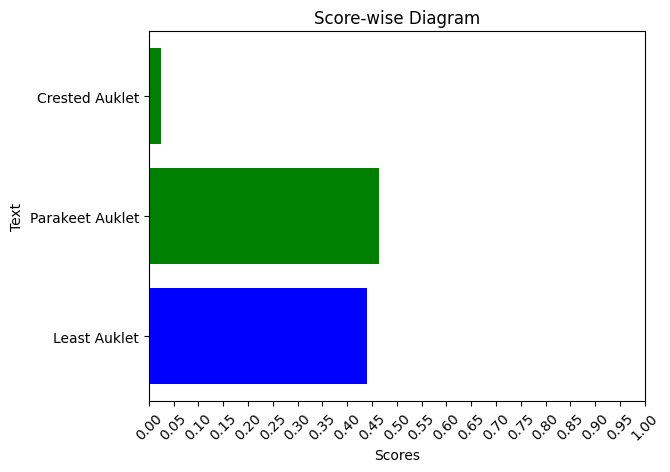

In [7]:
counter_dict = dict()
classes = ["Crested Auklet", "Least Auklet", "Parakeet Auklet", "Rhinoceros Auklet"]
for image_name in tqdm(images_names):
    image = Image.open(os.path.join(crested_auklet_loc, image_name))
    texts = ["This is a photo of a Crested Auklet", "This is a photo of Least Auklet", 
             "This is a photo of Parakeet Auklet", "This is a photo of Rhinoceros Auklet"]

    image_pre = preprocess(image).unsqueeze(0).to(device)
    text_token = clip.tokenize(texts, truncate = True).to(device)
    # Calculate features
    with torch.no_grad():
        image_features = model.encode_image(image_pre)
        text_features = model.encode_text(text_token)

    # Pick the top 5 most similar labels for the image
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)
    similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
    scores = similarity[0]
    if classes[int(torch.argmax(scores))] in counter_dict:
        counter_dict[classes[int(torch.argmax(scores))]] += 1
    else:
        counter_dict[classes[int(torch.argmax(scores))]] = 0
    # # print(answer)
for key, val in counter_dict.items():
    counter_dict[key] /= len(images_names)
    

labels = list(counter_dict.keys())
acc = list(counter_dict.values())
colors = ['blue' if label == classes[1] else 'green' for label in labels]
plt.barh(labels, acc, color=colors)
num_ticks = 21  # Adjust the number of ticks as needed
tick_positions = np.linspace(0, 1, num_ticks)
plt.xticks(tick_positions, rotation=45)

plt.xlabel('Scores')
plt.ylabel('Text')
plt.title('Score-wise Diagram')

#     Show the plot
plt.show()

# Using the output directly from GPT with truncate
#### Query - What are useful visual features for distinguishing a Crested Auklet in a photo? give your answer in a paragraph

100%|██████████████████████████████████████████| 41/41 [00:00<00:00, 117.63it/s]


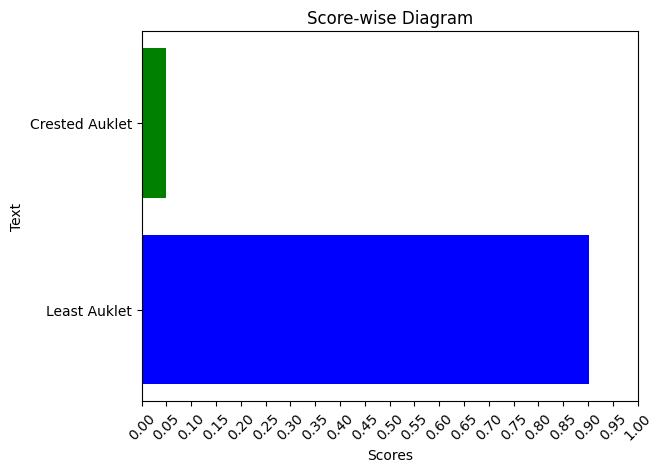

In [8]:
counter_dict = dict()
classes = ["Crested Auklet", "Least Auklet", "Parakeet Auklet", "Rhinoceros Auklet"]
for image_name in tqdm(images_names):
    image = Image.open(os.path.join(crested_auklet_loc, image_name))
    texts = ["Distinguishing a Crested Auklet in a photo relies on several key visual features unique to this seabird species. One prominent characteristic is the distinct, forward-curving plume or crest extending from the top of its head, which is particularly prominent during the breeding season. This crest, often brightly colored, serves as a prominent visual marker. Additionally, Crested Auklets exhibit a blackish cap on their heads and possess striking white facial plumes that extend backward, contrasting sharply with their dark plumage. The presence of bright orange or yellow skin at the base of the bill and around the eyes further aids in identification. Observing these features in a photograph, especially in conjunction with the bird's small size and compact body shape, can reliably distinguish the Crested Auklet from other seabird species, facilitating accurate bird identification for ornithologists and bird enthusiasts alike.", 
             "Distinguishing a Least Auklet in a photo involves recognizing several key visual features specific to this small seabird species. One distinctive characteristic is its dark plumage, often appearing black or charcoal gray, covering most of its body. The Least Auklet has a relatively short, stubby bill, and during the breeding season, it develops a striking white eye crescent that contrasts with its dark facial markings. Additionally, this species exhibits a white plume extending backward from the eyes, giving it a distinct appearance. The combination of a compact body, short bill, dark plumage, and the contrasting white facial markings, especially the eye crescent and plume, are crucial visual cues for identifying the Least Auklet in photographs or in the field, aiding birdwatchers and researchers in accurate species identification.", 
             "Distinguishing a Parakeet Auklet in a photo involves noting several distinctive visual features characteristic of this seabird species. One prominent feature is its vibrant, greenish-yellow bill, which sets it apart from other auklet species. The bill's unique coloration is especially pronounced during the breeding season. The Parakeet Auklet also displays a striking combination of dark facial markings and white plumage on its head, forming a distinctive cap. The eyes are encircled by a thin, white crescent, contributing to its identifiable appearance. Additionally, its overall body plumage tends to be dark, often appearing black or charcoal gray. Recognizing the interplay between the greenish-yellow bill, dark facial markings, white cap, and contrasting plumage aids in accurate identification of the Parakeet Auklet in photographs, facilitating birdwatching and ornithological research efforts.",
             "Distinguishing a Rhinoceros Auklet in a photo involves recognizing several distinctive visual features specific to this seabird species. One key characteristic is the presence of a prominent, vertically ridged horn or rhino-like bill, which is particularly noticeable during the breeding season. This unique bill structure sets the Rhinoceros Auklet apart from other auklet species. Additionally, it has dark plumage covering most of its body, complemented by white facial markings and a distinctive white mark on its bill. The eyes are encircled by a thin, white crescent, adding to its recognizable appearance. Observing the interplay between the horned bill, dark plumage, and contrasting white facial features assists in accurately identifying the Rhinoceros Auklet in photographs, facilitating birdwatching and ecological studies."]


    image_pre = preprocess(image).unsqueeze(0).to(device)
    text_token = clip.tokenize(texts, truncate = True).to(device)
    # Calculate features
    with torch.no_grad():
        image_features = model.encode_image(image_pre)
        text_features = model.encode_text(text_token)

    # Pick the top 5 most similar labels for the image
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)
    similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
    scores = similarity[0]
    if classes[int(torch.argmax(scores))] in counter_dict:
        counter_dict[classes[int(torch.argmax(scores))]] += 1
    else:
        counter_dict[classes[int(torch.argmax(scores))]] = 0
    # # print(answer)
for key, val in counter_dict.items():
    counter_dict[key] /= len(images_names)
    

labels = list(counter_dict.keys())
acc = list(counter_dict.values())
colors = ['blue' if label == classes[1] else 'green' for label in labels]
plt.barh(labels, acc, color=colors)
num_ticks = 21  # Adjust the number of ticks as needed
tick_positions = np.linspace(0, 1, num_ticks)
plt.xticks(tick_positions, rotation=45)

plt.xlabel('Scores')
plt.ylabel('Text')
plt.title('Score-wise Diagram')

#     Show the plot
plt.show()

# Adding the text embeddings
#### Query - What are useful visual features for distinguishing a Crested Auklet in a photo? give your answer in a small bullet points

100%|███████████████████████████████████████████| 41/41 [00:00<00:00, 56.29it/s]


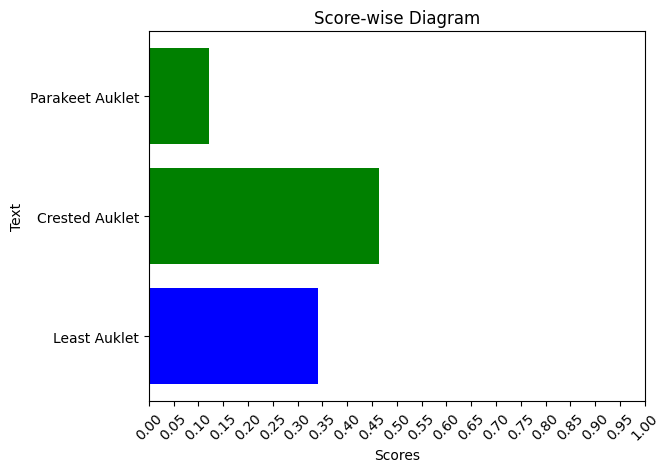

In [9]:
counter_dict = dict()
classes = ["Crested Auklet", "Least Auklet", "Parakeet Auklet", "Rhinoceros Auklet"]
for image_name in tqdm(images_names):
    image = Image.open(os.path.join(crested_auklet_loc, image_name))
    texts = [['''Crested Plume: Look for the distinctive crest on the head of the Crested Auklet. It's a notable feature and can help distinguish it from other seabirds.''',
    '''Bill Color: Pay attention to the color of the bill. Crested Auklets typically have a bright orange or reddish bill, which can be a key identifying characteristic.''',
    '''Eye Stripe: Check for the dark eye stripe that runs from the eye to the back of the head. This is a common feature in Crested Auklets and can aid in identification.''',
    '''White Facial Feathers: Note the presence of white facial feathers, particularly around the eye area. This can create a contrasting pattern with the darker feathers on the rest of the head.''',
    '''Size and Shape: Consider the overall size and shape of the bird. Crested Auklets are relatively small seabirds with a compact body, and their distinct features should be proportional to their size.''',
    '''Behavior: Take note of the bird's behavior, as Crested Auklets are known for their active and social nature. Observing their interactions with other birds can provide additional clues for identification.''',
    '''Habitat: Consider the location where the photo was taken. Crested Auklets are typically found in marine environments, especially around the Bering Sea and North Pacific Ocean.''',
    '''Breeding Plumage: During the breeding season, Crested Auklets display more vibrant and distinctive features. Look for any signs of breeding plumage, such as changes in coloration or additional ornamental features.'''],
             ['''Size and Shape: Least Auklets are small seabirds with a compact body. Pay attention to their overall size and shape, as this can help distinguish them from larger seabird species.''',
    '''Bill Color and Shape: Examine the color and shape of the bill. Least Auklets typically have a short, stubby bill that is dark in color, often black. The shape and color of the bill can be a key identifying characteristic.''',
    '''Dark Cap: Look for the dark cap on the head, extending down to the eyes. This contrasting dark cap is a distinctive feature of Least Auklets.''',
    '''White Facial Feathers: Note the presence of white facial feathers, especially around the eye area. This can create a contrasting pattern with the darker cap and contribute to identification.''',
    '''Eye Ring: Check for a distinctive white eye ring. This feature, along with the dark cap, can be helpful in distinguishing Least Auklets from other similar seabirds.''',
    '''Behavior: Observe the bird's behavior. Least Auklets are known for their agile and active flying, and they often forage in large groups. Behavior patterns can provide additional clues for identification.''',
    '''Habitat: Consider the location where the photo was taken. Least Auklets are typically found in marine environments, often breeding on rocky cliffs in the Arctic region.''',
    '''Seasonal Plumage Changes: Be aware of seasonal changes in plumage. During the breeding season, some seabirds, including Least Auklets, may exhibit changes in coloration or additional ornamental features.'''], 
             ['''Facial Pattern: Look for the distinctive facial pattern of the Parakeet Auklet, including the dark mask that extends from the eye to the nape of the neck. This contrasting facial pattern is a key identifier.''',
    '''Bill Shape and Color: Examine the bill, which is short, stubby, and brightly colored. Parakeet Auklets have a distinctive bill that is bright orange or reddish in color, which can help differentiate them from other auklet species.''',
    '''Eye Color: Note the color of the eyes. Parakeet Auklets typically have pale or whitish eyes, contrasting with the dark facial mask.''',
    '''Head and Body Coloration: Observe the overall coloration of the head and body. Parakeet Auklets have dark brown to blackish heads and necks, which transition to a lighter color on the lower body.''',
    '''Bill Plates: Check for the presence of bill plates, which are small, ornamental plates on the upper and lower parts of the bill. These can be more prominent during the breeding season and are unique to Parakeet Auklets.''',
    '''Size and Shape: Consider the size and shape of the bird. Parakeet Auklets are medium-sized seabirds with a compact body, and their features should be proportional to their size.''',
    '''Behavior: Observe the behavior of the bird, as Parakeet Auklets are known for their agile flight and may engage in social behaviors, especially during the breeding season.''',
    '''Habitat: Consider the bird's location. Parakeet Auklets are typically found in marine environments, especially around the Bering Sea and North Pacific Ocean.'''],
             ['''Bill Shape: Pay attention to the distinctive bill of the Rhinoceros Auklet, which has a prominent "rhinoceros horn" or "nail-like" projection on the upper part of the bill, particularly during the breeding season.''',
    '''Bill Color: Examine the color of the bill. Rhinoceros Auklets typically have a pale bill with a reddish-orange base. The coloration can be an important distinguishing feature.''',
    '''Eye Markings: Look for the white crescent-shaped lines or markings around the eyes. These eye markings, along with the bill, contribute to the characteristic facial pattern of the Rhinoceros Auklet.''',
    '''Body Coloration: Observe the overall coloration of the body. Rhinoceros Auklets have dark plumage, often black or dark brown, and a white patch on the wings that is visible in flight.''',
    '''Size and Shape: Consider the size and shape of the bird. Rhinoceros Auklets are medium-sized seabirds with a stocky build. Their features should be proportional to their size.''',
    '''Behavior: Take note of the bird's behavior, as Rhinoceros Auklets are known for their strong, direct flight and often fly low over the water. Observing behavior patterns can provide additional clues for identification.''',
    '''Habitat: Consider the location where the photo was taken. Rhinoceros Auklets are typically found in marine environments, especially along rocky coastlines in the North Pacific.''',
    '''Breeding Plumage: During the breeding season, Rhinoceros Auklets may exhibit more vibrant plumage and ornamental features. Look for any changes in coloration or additional markings.''']]

    text_tokens = []
    encoded_text_list = []
    for index, bp in enumerate(texts):
        with torch.no_grad():
            emb = model.encode_text(clip.tokenize(bp, truncate = False).to(device)).clone().detach()
            emb = emb.sum(dim=0)
            encoded_text_list.append(emb.clone().detach())
        
    text_features = torch.stack(encoded_text_list, dim = 0)
    image_pre = preprocess(image).unsqueeze(0).to(device)
    # print(type(text_features))
    # print(type(text_features[0]))

    # Calculate features
    with torch.no_grad():
        image_features = model.encode_image(image_pre)

    # Pick the top 5 most similar labels for the image
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)
    similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
    scores = similarity[0]
    if classes[int(torch.argmax(scores))] in counter_dict:
        counter_dict[classes[int(torch.argmax(scores))]] += 1
    else:
        counter_dict[classes[int(torch.argmax(scores))]] = 0
    # # print(answer)
for key, val in counter_dict.items():
    counter_dict[key] /= len(images_names)
    

labels = list(counter_dict.keys())
acc = list(counter_dict.values())
colors = ['blue' if label == classes[1] else 'green' for label in labels]
plt.barh(labels, acc, color=colors)
num_ticks = 21  # Adjust the number of ticks as needed
tick_positions = np.linspace(0, 1, num_ticks)
plt.xticks(tick_positions, rotation=45)

plt.xlabel('Scores')
plt.ylabel('Text')
plt.title('Score-wise Diagram')

#     Show the plot
plt.show()

# Adding the text embeddings
#### What are useful visual features for distinguishing a Crested Auklet in a photo give descriptions in the format of a Python list of string

100%|███████████████████████████████████████████| 41/41 [00:00<00:00, 44.30it/s]


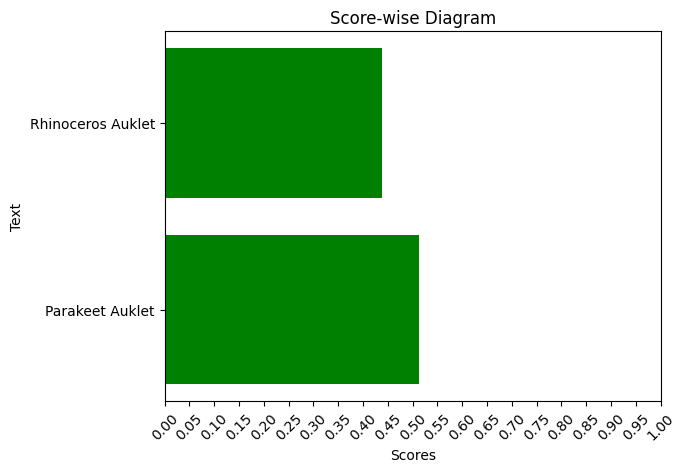

In [10]:
counter_dict = dict()
classes = ["Crested Auklet", "Least Auklet", "Parakeet Auklet", "Rhinoceros Auklet"]
for image_name in tqdm(images_names):
    image = Image.open(os.path.join(crested_auklet_loc, image_name))
    texts = [["This is a photo of a Crested Auklet",
    "Crested plume on the head, resembling a twisted horn",
    "White facial plumes extending from the eye to the back of the head",
    "Black body with a distinctive white patch on the sides",
    "Orange bill with a pale base",
    "Reddish-orange legs and feet",
    "Small size, typically around 30 cm (12 inches) in length",
    "Dark eyes with a white eye ring",
    "Unique bill shape, slightly curved and slender",
    "Short wings relative to body size",
    "Often seen in large colonies during the breeding season",
    "Plumage variations between breeding and non-breeding seasons"],
    ["This is a photo of Least Auklet",
     "Small size, typically around 20 cm (8 inches) in length",
    "Dark plumage with a blackish-brown body",
    "White facial plumes forming a distinct mask around the eyes",
    "Short and stubby orange bill",
    "Dark eyes with no conspicuous eye ring",
    "White patch on the sides of the body",
    "Short wings relative to body size",
    "Orange legs and feet",
    "Inconspicuous crest or plume on the head",
    "Often seen in large colonies during the breeding season",
    "Plumage variations between breeding and non-breeding seasons"], 
    ["This is a photo of Parakeet Auklet",
     "Medium-sized seabird, approximately 25–30 cm (10–12 inches) in length",
    "Distinctive bright green or yellow-green bill with a pale base",
    "White face with a dark eye patch and a thin white eye ring",
    "Dark crown and nape contrasting with the lighter face",
    "Dark plumage on the body, often with a bluish tint",
    "White patch on the sides of the body",
    "Short, pointed wings relative to body size",
    "Short tail with rounded tips",
    "Orange legs and feet",
    "May exhibit a small, inconspicuous crest on the head",
    "Often seen in large colonies during the breeding season",
    "Plumage variations between breeding and non-breeding seasons"],
    ["This is a photo of Rhinoceros Auklet",
     "Medium to large-sized seabird, measuring around 38–46 cm (15–18 inches) in length",
    "Distinctive thick, laterally-compressed bill with a prominent 'horn' or 'rhino' at the base",
    "Dark plumage on the head, neck, and upperparts",
    "White face with a dark eye patch and a thin white eye ring",
    "White underparts extending to the sides of the neck",
    "Short wings relative to body size",
    "Short tail with rounded tips",
    "Orange legs and feet with webbed toes",
    "Often seen in pairs or small groups during the breeding season",
    "Distinctive 'growling' or 'barking' vocalizations",
    "Plumage variations between breeding and non-breeding seasons"]]

    text_tokens = []
    encoded_text_list = []
    for index, bp in enumerate(texts):
        with torch.no_grad():
            emb = model.encode_text(clip.tokenize(bp, truncate = False).to(device)).clone().detach()
            emb = emb.mean(dim=0)
            encoded_text_list.append(emb.clone().detach())
        
    text_features = torch.stack(encoded_text_list, dim = 0)
    image_pre = preprocess(image).unsqueeze(0).to(device)
    # print(type(text_features))
    # print(type(text_features[0]))

    # Calculate features
    with torch.no_grad():
        image_features = model.encode_image(image_pre)

    # Pick the top 5 most similar labels for the image
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)
    similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
    scores = similarity[0]
    if classes[int(torch.argmax(scores))] in counter_dict:
        counter_dict[classes[int(torch.argmax(scores))]] += 1
    else:
        counter_dict[classes[int(torch.argmax(scores))]] = 0
    
#     plt.barh(classes, scores, color='skyblue')
#     plt.xlabel('Scores')
#     plt.ylabel('Text')
#     plt.title('Score-wise Diagram')

    # Show the plot
#     plt.show()

    # # print(answer)
for key, val in counter_dict.items():
    counter_dict[key] /= len(images_names)
    

labels = list(counter_dict.keys())
acc = list(counter_dict.values())
colors = ['blue' if label == classes[1] else 'green' for label in labels]
plt.barh(labels, acc, color=colors)
num_ticks = 21  # Adjust the number of ticks as needed
tick_positions = np.linspace(0, 1, num_ticks)
plt.xticks(tick_positions, rotation=45)

plt.xlabel('Scores')
plt.ylabel('Text')
plt.title('Score-wise Diagram')

#     Show the plot
plt.show()

# Using the output directly from GPT without truncate and adding
#### Query - What are useful visual features for distinguishing a Crested Auklet in a photo? give your answer in a paragraph

100%|██████████████████████████████████████████| 41/41 [00:00<00:00, 115.26it/s]


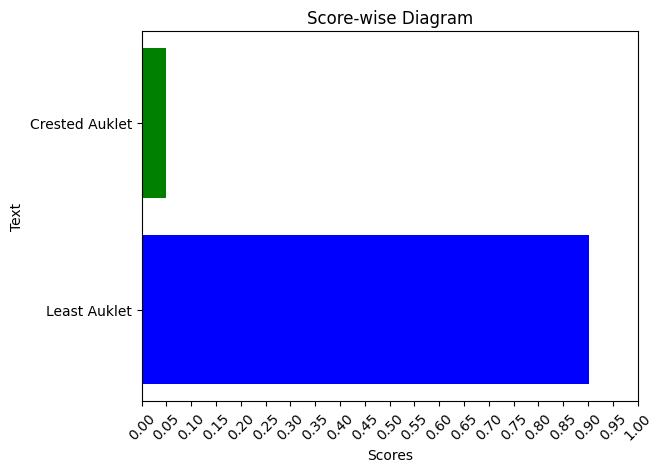

In [11]:
counter_dict = dict()
classes = ["Crested Auklet", "Least Auklet", "Parakeet Auklet", "Rhinoceros Auklet"]
for image_name in tqdm(images_names):
    image = Image.open(os.path.join(crested_auklet_loc, image_name))
    texts = ["Distinguishing a Crested Auklet in a photo relies on several key visual features unique to this seabird species. One prominent characteristic is the distinct, forward-curving plume or crest extending from the top of its head, which is particularly prominent during the breeding season. This crest, often brightly colored, serves as a prominent visual marker. Additionally, Crested Auklets exhibit a blackish cap on their heads and possess striking white facial plumes that extend backward, contrasting sharply with their dark plumage. The presence of bright orange or yellow skin at the base of the bill and around the eyes further aids in identification. Observing these features in a photograph, especially in conjunction with the bird's small size and compact body shape, can reliably distinguish the Crested Auklet from other seabird species, facilitating accurate bird identification for ornithologists and bird enthusiasts alike.", 
             "Distinguishing a Least Auklet in a photo involves recognizing several key visual features specific to this small seabird species. One distinctive characteristic is its dark plumage, often appearing black or charcoal gray, covering most of its body. The Least Auklet has a relatively short, stubby bill, and during the breeding season, it develops a striking white eye crescent that contrasts with its dark facial markings. Additionally, this species exhibits a white plume extending backward from the eyes, giving it a distinct appearance. The combination of a compact body, short bill, dark plumage, and the contrasting white facial markings, especially the eye crescent and plume, are crucial visual cues for identifying the Least Auklet in photographs or in the field, aiding birdwatchers and researchers in accurate species identification.", 
             "Distinguishing a Parakeet Auklet in a photo involves noting several distinctive visual features characteristic of this seabird species. One prominent feature is its vibrant, greenish-yellow bill, which sets it apart from other auklet species. The bill's unique coloration is especially pronounced during the breeding season. The Parakeet Auklet also displays a striking combination of dark facial markings and white plumage on its head, forming a distinctive cap. The eyes are encircled by a thin, white crescent, contributing to its identifiable appearance. Additionally, its overall body plumage tends to be dark, often appearing black or charcoal gray. Recognizing the interplay between the greenish-yellow bill, dark facial markings, white cap, and contrasting plumage aids in accurate identification of the Parakeet Auklet in photographs, facilitating birdwatching and ornithological research efforts.",
             "Distinguishing a Rhinoceros Auklet in a photo involves recognizing several distinctive visual features specific to this seabird species. One key characteristic is the presence of a prominent, vertically ridged horn or rhino-like bill, which is particularly noticeable during the breeding season. This unique bill structure sets the Rhinoceros Auklet apart from other auklet species. Additionally, it has dark plumage covering most of its body, complemented by white facial markings and a distinctive white mark on its bill. The eyes are encircled by a thin, white crescent, adding to its recognizable appearance. Observing the interplay between the horned bill, dark plumage, and contrasting white facial features assists in accurately identifying the Rhinoceros Auklet in photographs, facilitating birdwatching and ecological studies."]


    image_pre = preprocess(image).unsqueeze(0).to(device)
    text_token = clip.tokenize(texts, truncate = True).to(device)
    # Calculate features
    with torch.no_grad():
        image_features = model.encode_image(image_pre)
        text_features = model.encode_text(text_token)

    # Pick the top 5 most similar labels for the image
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)
    similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
    scores = similarity[0]
    if classes[int(torch.argmax(scores))] in counter_dict:
        counter_dict[classes[int(torch.argmax(scores))]] += 1
    else:
        counter_dict[classes[int(torch.argmax(scores))]] = 0
    # # print(answer)
for key, val in counter_dict.items():
    counter_dict[key] /= len(images_names)
    

labels = list(counter_dict.keys())
acc = list(counter_dict.values())
colors = ['blue' if label == classes[1] else 'green' for label in labels]
plt.barh(labels, acc, color=colors)
num_ticks = 21  # Adjust the number of ticks as needed
tick_positions = np.linspace(0, 1, num_ticks)
plt.xticks(tick_positions, rotation=45)

plt.xlabel('Scores')
plt.ylabel('Text')
plt.title('Score-wise Diagram')

#     Show the plot
plt.show()